![](https://www.gettyimages.fi/detail/photo/motorcycle-accident-motorradunfall-royalty-free-image/170034903?adppopup=true)

![](https://www.gettyimages.fi/detail/photo/motorcycle-accident-motorradunfall-royalty-free-image/170034903?adppopup=true)

![](accidents.jpg "Title")


# USA car accidents

* This is a countrywide car accident [dataset](https://www.kaggle.com/sobhanmoosavi/us-accidents), which covers 49 states of the USA. 
* The accident data are collected for the duration of February 2016 to December 2019.

In [1]:
# DATA 
# https://www.kaggle.com/sobhanmoosavi/us-accidents (Data)
# https://smoosavi.org/datasets/us_accidents (Details)
# https://www.kaggle.com/python10pm/pandas-100-tricks (tricks)

## Importing modules

In [2]:
import os
import dask
import dask.dataframe as dd
import dask.array as da
from glob import glob
import h5py

# Data science imports
import pandas as pd
import numpy as np

# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

%matplotlib inline

# Options for pandas
#pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

## Loading the dataset.
The dataset is loaded as dask dataframe. 

In [3]:
%%time
df = dd.read_csv("US_Accidents_Dec19.csv")
df.head()

CPU times: user 2.17 s, sys: 156 ms, total: 2.33 s
Wall time: 2.34 s


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


## Listing the columns.

In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Checking the shape of data.

In [5]:
df.shape

(Delayed('int-af48550a-6e97-4eb5-a93c-6dd758460291'), 49)

In [6]:
len(df.columns)

49

In [7]:
len(df.index)

2974335

## Checking summary.

In [8]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
npartitions=1,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Finding the total number of rows. 

In [9]:
df["Source"].compute().shape

(2974335,)

## Finding the number of missing values in each column.

In [10]:
missing_values = df.isnull().sum()
missing_values.compute()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

## Calculating the missing value percentage wise

In [11]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count_pct = missing_count.compute()
missing_count_pct

ID                        0.000000
Source                    0.000000
TMC                      24.478446
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  75.521554
End_Lng                  75.521554
Distance(mi)              0.000000
Description               0.000034
Number                   64.471722
Street                    0.000000
Side                      0.000000
City                      0.002791
County                    0.000000
State                     0.000000
Zipcode                   0.029586
Country                   0.000000
Timezone                  0.106343
Airport_Code              0.191337
Weather_Timestamp         1.234057
Temperature(F)            1.884892
Wind_Chill(F)            62.286965
Humidity(%)               1.989453
Pressure(in)              1.618580
Visibility(mi)            2.208595
Wind_Direction      

## Selecting the columns to be dropped having more than 50% missing value

In [12]:
columns_to_drop = missing_count_pct[missing_count_pct > 50].index
columns_to_drop
#df_accident = df.drop(columns_to_drop, axis=1)

Index(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')

## Dropping few columns which we won't use for analysis.

In [13]:
df_accident  = df.drop(['TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 
                'Precipitation(in)', 'Civil_Twilight', 'Nautical_Twilight',
               'Astronomical_Twilight', 'Description', 'ID', 'Amenity',
                                'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                                'Distance(mi)', 'Traffic_Calming',
               'Turning_Loop', 'Wind_Direction', 
               'Humidity(%)','Pressure(in)'], axis = 1)
df_accident.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,...,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition,Traffic_Signal,Sunrise_Sunset
0,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,I-70 E,R,Dayton,Montgomery,...,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,10.0,NaN,Light Rain,False,Night
1,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Brice Rd,L,Reynoldsburg,Franklin,...,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,10.0,NaN,Light Rain,False,Night
2,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,State Route 32,R,Williamsburg,Clermont,...,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,10.0,3.5,Overcast,True,Night
3,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,I-75 S,R,Dayton,Montgomery,...,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,9.0,4.6,Mostly Cloudy,False,Night
4,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,6.0,3.5,Mostly Cloudy,True,Day


## Checking the info of the data.

In [14]:
df_accident.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974335 entries, 0 to 97051
Data columns (total 22 columns):
Source               object
Severity             int64
Start_Time           object
End_Time             object
Start_Lat            float64
Start_Lng            float64
Street               object
Side                 object
City                 object
County               object
State                object
Zipcode              object
Country              object
Timezone             object
Airport_Code         object
Weather_Timestamp    object
Temperature(F)       float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition    object
Traffic_Signal       bool
Sunrise_Sunset       object
dtypes: bool(1), float64(5), int64(1), object(15)
memory usage: 502.1+ MB


## Creating a new column by extracting date from "Start_Time".

In [15]:
df_accident['Date'] = dd.to_datetime(df_accident['Start_Time']).dt.date

## Changing the date format to datetime64.

In [16]:
df_accident.astype({'Date': 'datetime64'}).dtypes

Source                       object
Severity                      int64
Start_Time                   object
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
Street                       object
Side                         object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Timezone                     object
Airport_Code                 object
Weather_Timestamp            object
Temperature(F)              float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Weather_Condition            object
Traffic_Signal                 bool
Sunrise_Sunset               object
Date                 datetime64[ns]
dtype: object

## Checking the dtypes after converting the date dtype.

In [17]:
df_accident.dtypes

Source                object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Street                object
Side                  object
City                  object
County                object
State                 object
Zipcode               object
Country               object
Timezone              object
Airport_Code          object
Weather_Timestamp     object
Temperature(F)       float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
Traffic_Signal          bool
Sunrise_Sunset        object
Date                  object
dtype: object

## Finding the total number of rows (or no. of accidents).

In [18]:
len(df_accident) # total number of accidents

2974335

## Checking the number of rows

In [19]:
len(df_accident.index)

2974335

## Checking the number of columns

In [20]:
len(df_accident.columns) 

23

## Calculating the statistics of the whole dataframe

In [21]:
df_accident.describe().compute()

,Severity,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph)
count,2.974335e+06,2.974335e+06,2.974335e+06,2.918272e+06,2.908644e+06,2.533495e+06
mean,2.360190e+00,3.649361e+01,-9.542625e+01,6.235120e+01,9.150770e+00,8.298064e+00
std,5.414733e-01,4.918849e+00,1.721881e+01,1.878855e+01,2.892114e+00,5.138546e+00
min,1.000000e+00,2.455527e+01,-1.246238e+02,-7.780000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.404630e+01,-9.855540e+01,5.720000e+01,1.000000e+01,5.800000e+00
50%,2.000000e+00,3.901556e+01,-8.667045e+01,6.800000e+01,1.000000e+01,8.100000e+00
75%,3.000000e+00,4.213451e+01,-7.556890e+01,8.500000e+01,1.000000e+01,1.270000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,1.706000e+02,1.400000e+02,8.228000e+02


## Finding total number of accidents from each source.

In [22]:
df_accident['Source'].value_counts().compute()

MapQuest         2204098
Bing              728071
MapQuest-Bing      42166
Name: Source, dtype: int64

## Plotting the distribution of source

In [23]:
(df_accident['Source']
 .value_counts().compute()
 .reset_index()
 .iplot(kind='pie', labels='index', values='Source', textinfo='value+percent', 
        pull=0.05, title='Distribution of Sources of Information'))

## Generating a correlation matrix

In [24]:
corr_mat = df_accident.corr().compute()

In [25]:
figure = ff.create_annotated_heatmap(
    z=corr_mat.values,
    x=list(corr_mat.columns),
    y=list(corr_mat.index),
    annotation_text=corr_mat.round(2).values,
    showscale=True)

figure

## Checking the highest severity index.

In [26]:
%time
df_accident.Severity.max().compute()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 6.2 µs


4

## Plotting the severity distribution

In [27]:
(df_accident['Severity']
 .value_counts().compute()
 .reset_index()
 .iplot(kind='pie', labels='index', values='Severity', textinfo='value+percent', 
        pull=0.05, title='Distribution of Severity of cases'))

## Visualizing the severity.

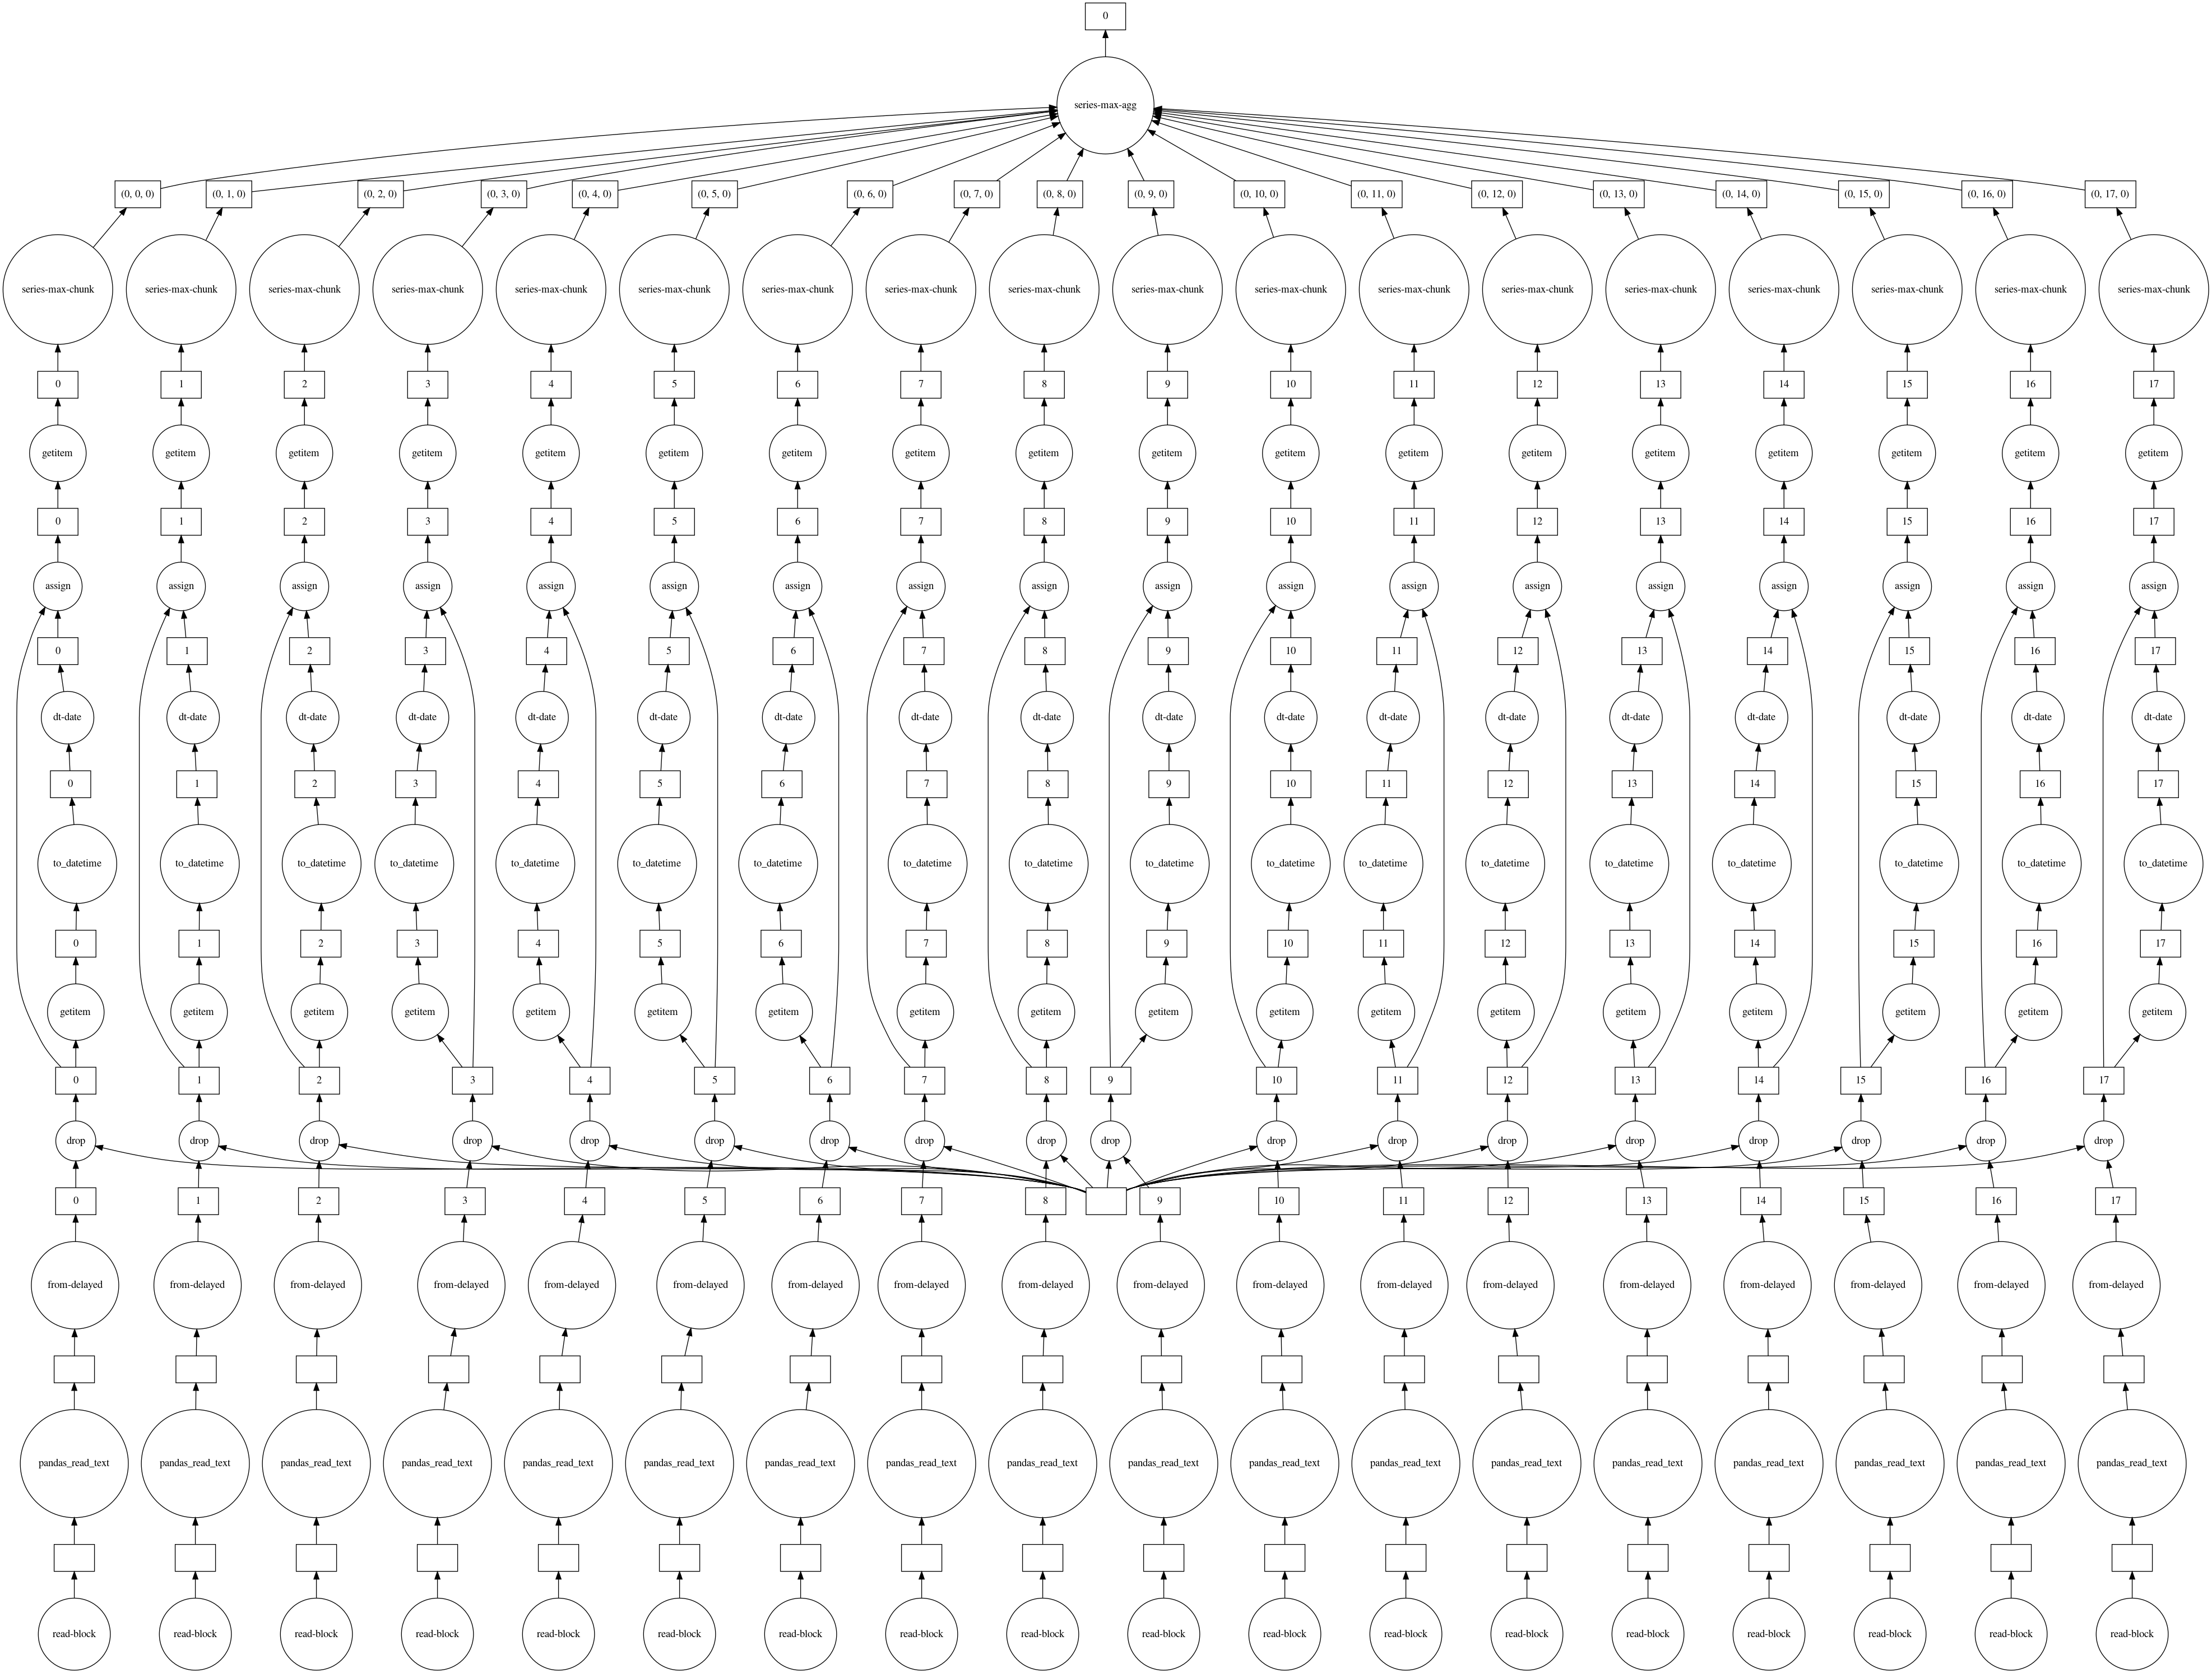

In [28]:
df_accident.Severity.max().visualize()

## Calculating the most affected side

In [29]:
df_accident['Side'].value_counts().compute().iplot(kind = 'bar',
                                                   colors = 'mediumvioletred')

## Timezone count with number of accident for each

In [30]:
df_accident['Timezone'].value_counts().compute().iplot(kind = 'bar', 
                                                       colors = 'firebrick')

## Showing the condition and the accidents that happened in that condition

In [31]:
df_accident.Weather_Condition.value_counts().compute().iplot(
fill=True,colors=['pink'], world_readable=True)

# State-wise analysis

## Creating a new dataset state-wise.

In [32]:
tot_accident_statewise=df_accident.groupby("State").Source.count().compute()
tot_accident_statewise

State
CA    663204
FL    223746
GA     83620
IA     10346
IL     86390
MO     29012
NE     22505
OH     55863
SC    146689
WI     17580
WV      2274
CT     22803
DC      3653
DE      4434
IN     30040
KY     19122
MA     33014
MD     43328
MI     88694
NH      7064
NJ     49942
NY    137799
OR     70840
PA     90395
RI     10483
TX    298062
VA     79957
WA     61367
AL     36369
AR      1749
AZ     62330
CO     40124
ID      1757
KS      6887
LA     52481
ME      2065
MN     62727
MS      5961
NC    142460
ND        43
NM      5020
NV      9524
OK     51297
TN     58289
UT     41385
VT       585
WY       492
MT       504
SD        60
Name: Source, dtype: int64

## Claculating the number of accidents per state

In [33]:
df_accident['State'].value_counts().compute().iplot(kind = 'bar', colors = 'navy')

## Checking the summary.

In [34]:
tot_accident_statewise.describe()

count        49.000000
mean      60700.714286
std      105914.781513
min          43.000000
25%        5961.000000
50%       33014.000000
75%       62727.000000
max      663204.000000
Name: Source, dtype: float64

## Resetting the index.

In [35]:
df_accident_statewise=tot_accident_statewise.reset_index()

## Checking the information of the dataset

In [36]:
df_accident_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
State     49 non-null object
Source    49 non-null int64
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes


## Showing total accidents cases in a map.

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_accident_statewise['State'], # Spatial coordinates
    z = df_accident_statewise['Source'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Accidents",
))

fig.update_layout(
    title_text = 'Accidents in states of the USA from February 2016 to December 2019',
    geo_scope='usa', # limite map scope to USA
)

#fig.show() 

We can see most accidents happened in CA.

# Creating a new data frame only for CA.

In [38]:
df_accident_CA=df_accident[(df_accident["State"] =="CA")]
df_accident_CA.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,...,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Date
728,MapQuest,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,Magazine St,R,Vallejo,Solano,...,US/Pacific,KAPC,2016-06-21 10:54:00,75.0,10.0,5.8,Clear,False,Day,2016-06-21
729,MapQuest,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,I-880 N,R,Hayward,Alameda,...,US/Pacific,KHWD,2016-06-21 10:54:00,75.0,10.0,4.6,Clear,False,Day,2016-06-21
730,MapQuest,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,I-680 N,R,Walnut Creek,Contra Costa,...,US/Pacific,KCCR,2016-06-21 10:53:00,82.9,10.0,4.6,Clear,False,Day,2016-06-21
731,MapQuest,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,N De Anza Blvd,R,Cupertino,Santa Clara,...,US/Pacific,KNUQ,2016-06-21 10:56:00,75.9,10.0,4.6,Clear,False,Day,2016-06-21
732,MapQuest,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,Norman Y Mineta Hwy,R,San Jose,Santa Clara,...,US/Pacific,KRHV,2016-06-21 09:50:00,75.2,10.0,5.8,Clear,False,Day,2016-06-21


## Extracting the data for each county of CA.

In [39]:
tot_accident_countywise_CA=df_accident_CA.groupby("County").Source.count().compute()
tot_accident_countywise_CA.head()

County
Alameda      45367
Amador         758
Butte         1413
Calaveras      927
Colusa         375
Name: Source, dtype: int64

## Showing the accidents for different counties through bar plot.

In [40]:
tot_accident_countywise_CA.iplot(
    kind='bar',
    xTitle='County',
    yTitle='Accidents',
    title='Accidents in CA')

## Resetting the index

In [41]:
df_accident_countywise_CA=tot_accident_countywise_CA.reset_index()
df_accident_countywise_CA.head()

,County,Source
0,Alameda,45367
1,Amador,758
2,Butte,1413
3,Calaveras,927
4,Colusa,375


## Showing the percentage of accidents in all county of CA.

In [42]:
df_accident_countywise_CA.iplot(
    kind='pie', 
    labels='County',
    values='Source',
    title='Percentage of Accidents')

# Date-wise analysis

## Creating a dataset with date-wise accidents numbers.

In [43]:
tot_accident_datewise=df_accident.groupby("Date").Source.count().compute()
tot_accident_datewise.head()

Date
2016-02-08    60
2016-02-09    59
2016-02-10    49
2016-02-11    93
2016-02-12    18
Name: Source, dtype: int64

## Creating a dataframe by resetting the index.

In [44]:
df_tot_accident_datewise=tot_accident_datewise.reset_index()
df_tot_accident_datewise.head()

,Date,Source
0,2016-02-08,60
1,2016-02-09,59
2,2016-02-10,49
3,2016-02-11,93
4,2016-02-12,18


## Setting the index to "Date".

In [45]:
df_tot_accident_datewise=df_tot_accident_datewise.set_index('Date')
df_tot_accident_datewise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 2016-02-08 to 2019-08-24
Data columns (total 1 columns):
Source    1422 non-null int64
dtypes: int64(1)
memory usage: 22.2+ KB


## Coverting the index (date) to datetime format.

In [46]:
df_tot_accident_datewise.index = pd.to_datetime(df_tot_accident_datewise.index)

## Sorting the index.

In [47]:
df_tot_accident_datewise.sort_index(inplace=True)
df_tot_accident_datewise.head()

,Source
Date,
2015-03-09,1
2016-01-14,7
2016-02-08,60
2016-02-09,59
2016-02-10,49


## Checking the info.

In [48]:
df_tot_accident_datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1422 entries, 2015-03-09 to 2020-01-01
Data columns (total 1 columns):
Source    1422 non-null int64
dtypes: int64(1)
memory usage: 22.2 KB


## Removing the bad data of 2015 and 2020.

In [49]:
df_tot_accident_datewise.drop(df_tot_accident_datewise.index[[0,1]], inplace=True)
df_tot_accident_datewise = df_tot_accident_datewise[~df_tot_accident_datewise.index.year.isin([2020])]

## Checking the data. 

In [50]:
df_tot_accident_datewise.head()
df_tot_accident_datewise.tail()

,Source
Date,
2016-02-08,60
2016-02-09,59
2016-02-10,49
2016-02-11,93
2016-02-12,18


,Source
Date,
2019-12-27,2899
2019-12-28,2177
2019-12-29,1558
2019-12-30,3298
2019-12-31,2674


## Converting the index (date) to datetime format.

In [51]:
df_tot_accident_datewise.index = pd.to_datetime(df_tot_accident_datewise.index)

## Checking the info.

In [52]:
df_tot_accident_datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1419 entries, 2016-02-08 to 2019-12-31
Data columns (total 1 columns):
Source    1419 non-null int64
dtypes: int64(1)
memory usage: 22.2 KB


## Showing the date-wise accidents.

In [53]:
df_tot_accident_datewise['Source'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Accidents',
    title='Accidents over Time (Daily)')

# Weekly data analysis.

In [54]:
df_tot_accident_weekly=df_tot_accident_datewise.resample('w').sum()
df_tot_accident_weekly.head()

,Source
Date,
2016-02-14,306
2016-02-21,353
2016-02-28,290
2016-03-06,264
2016-03-13,286


## Showing the number of accidents on weekly basis.

In [55]:
df_tot_accident_weekly['Source'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Accidents',
    title='Accidents over Time (Weekly)')

# Monthly data analysis.

In [56]:
df_tot_accident_monthly=df_tot_accident_datewise.resample('M').sum()
df_tot_accident_monthly.head()

,Source
Date,
2016-02-29,985
2016-03-31,6329
2016-04-30,18088
2016-05-31,17610
2016-06-30,30527


## Showing monthly accidents.

In [57]:
df_tot_accident_monthly['Source'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Accidents',
    title='Accidents over Time (Monthly)')

## Bar plot

In [58]:
df_tot_accident_monthly.iplot(
    kind='bar',
    xTitle='Date',
    yTitle='Number of Accidents',
    title='Monthly Accidents',
    linecolor='black',
    sortbars=True)

# Creating new column "hour" by extracting hour from Start_Time. 

In [59]:
df_accident['Hour'] = dd.to_datetime(df_accident['Start_Time']).dt.hour
df_accident.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,...,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Date,Hour
0,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,I-70 E,R,Dayton,Montgomery,...,KFFO,2016-02-08 05:58:00,36.9,10.0,NaN,Light Rain,False,Night,2016-02-08,5
1,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Brice Rd,L,Reynoldsburg,Franklin,...,KCMH,2016-02-08 05:51:00,37.9,10.0,NaN,Light Rain,False,Night,2016-02-08,6
2,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,State Route 32,R,Williamsburg,Clermont,...,KI69,2016-02-08 06:56:00,36.0,10.0,3.5,Overcast,True,Night,2016-02-08,6
3,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,I-75 S,R,Dayton,Montgomery,...,KDAY,2016-02-08 07:38:00,35.1,9.0,4.6,Mostly Cloudy,False,Night,2016-02-08,7
4,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,KMGY,2016-02-08 07:53:00,36.0,6.0,3.5,Mostly Cloudy,True,Day,2016-02-08,7


# Extracting number of accidents on hourly basis.

In [60]:
tot_accident_hour=df_accident.groupby("Hour").Source.count().compute()
tot_accident_hour

Hour
0      23189
1      18000
2      18944
3      18600
4      53594
5      83866
6     169079
7     273506
8     284274
9     177468
10    157867
11    155330
12    139166
13    142027
14    150242
15    177655
16    212576
17    221641
18    167411
19    115413
20     81733
21     57739
22     48299
23     26716
Name: Source, dtype: int64

## Resetting the index.

In [61]:
df_tot_accident_hour=tot_accident_hour.reset_index()
df_tot_accident_hour.head()

,Hour,Source
0,0,23189
1,1,18000
2,2,18944
3,3,18600
4,4,53594


## Showing the percentage of accidents on hourly basis.

In [62]:
df_tot_accident_hour.iplot(
    kind='pie', 
    labels='Hour',
    values='Source',
    title='Percentage of Accidents by Hour')